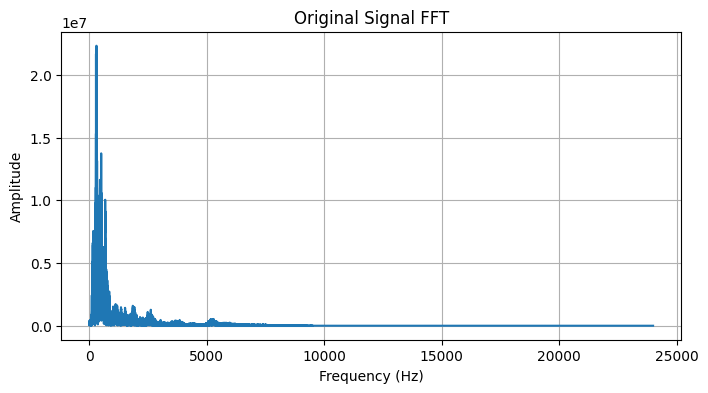

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
fs, data = wavfile.read('/content/AI_in_speech_processing.wav')

# Function to plot FFT spectrum
def plot_fft(signal, fs, title):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/fs)
    magnitude = np.abs(np.fft.fft(signal))
    plt.figure(figsize=(8, 4))
    plt.plot(freq[:n//2], magnitude[:n//2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid(True)
    plt.show()

# FFT for original signal
plot_fft(data, fs, 'Original Signal FFT')


# A1.Take a portion of your recorded signal which represents a vowel sound. Perform FFT on the signal snippet and observe the amplitude spectrum. Repeat the same for a few vowelsounds.

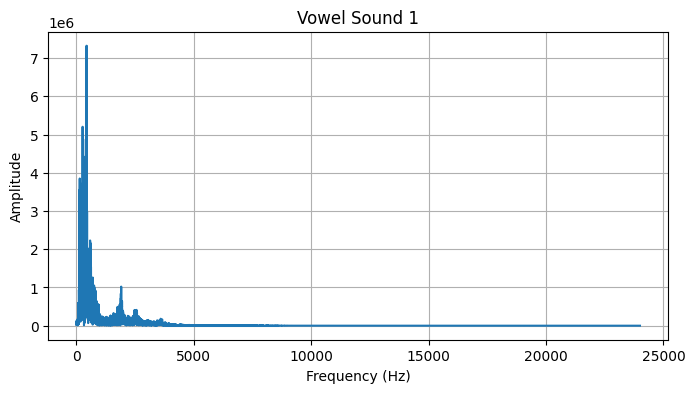

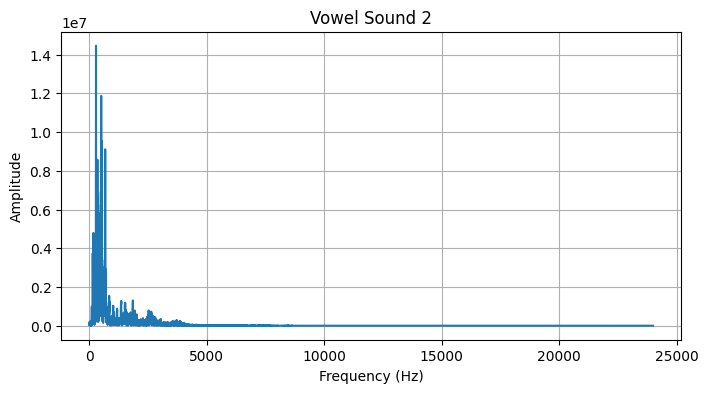

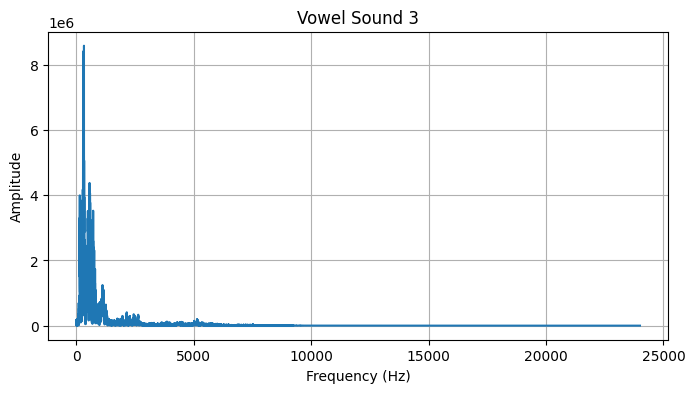

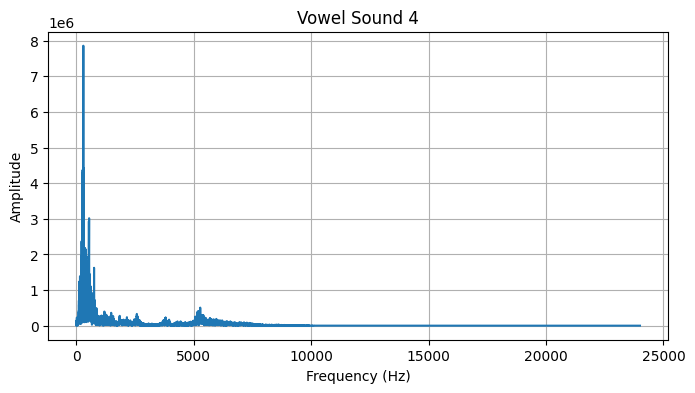

In [4]:
# A1. FFT for vowel sounds
vowel_samples = [slice(start, start + fs) for start in range(0, len(data), fs)]
for idx, sample in enumerate(vowel_samples):
    plot_fft(data[sample], fs, f'Vowel Sound {idx + 1}')



# A2. Repeat the A1 for a consonant sound. Perform the same for a few consonant sounds.

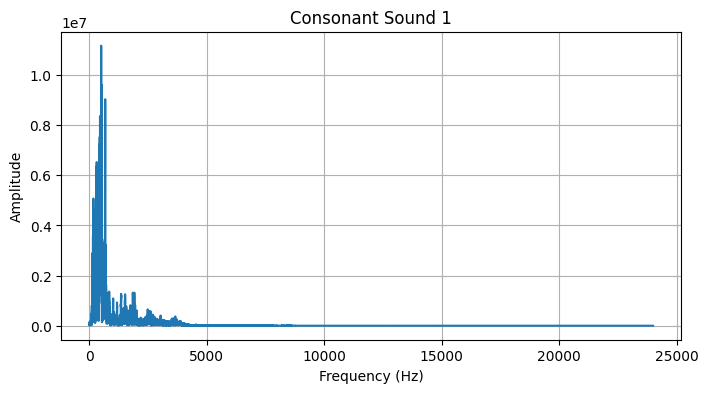

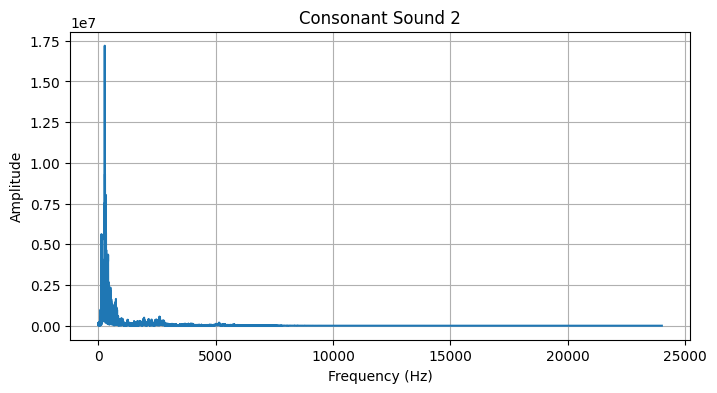

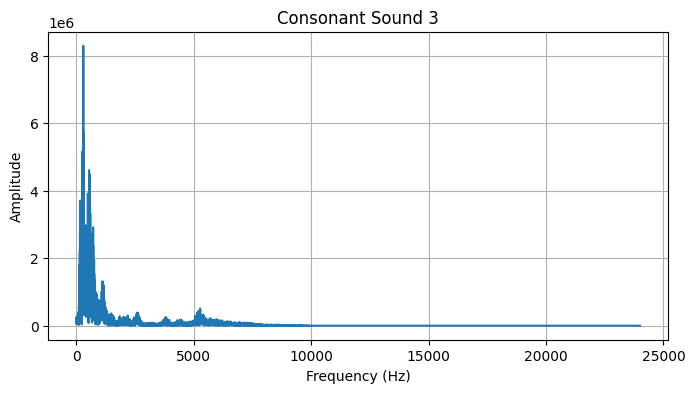

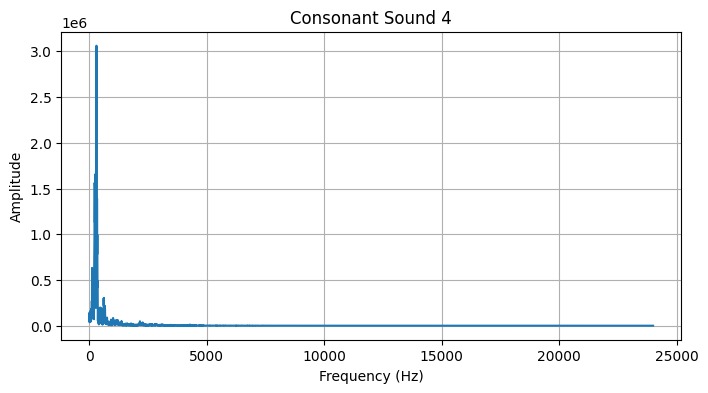

In [5]:
# A2. FFT for consonant sounds
consonant_samples = [slice(start, start + fs) for start in range(fs//2, len(data), fs)]
for idx, sample in enumerate(consonant_samples):
    plot_fft(data[sample], fs, f'Consonant Sound {idx + 1}')

# A3. Repeat A2 for few slices of silence & non-voiced portions of the recorded speech signal.

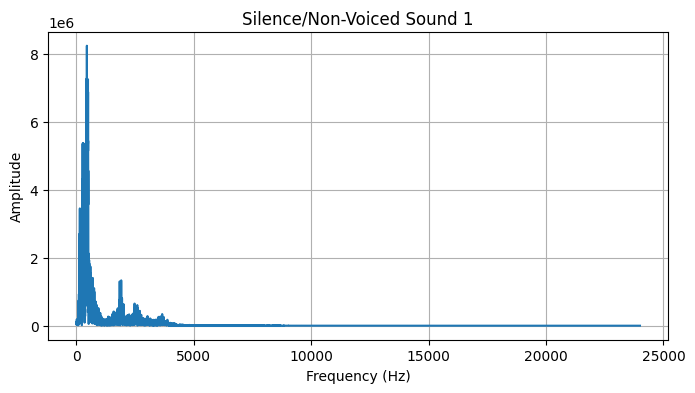

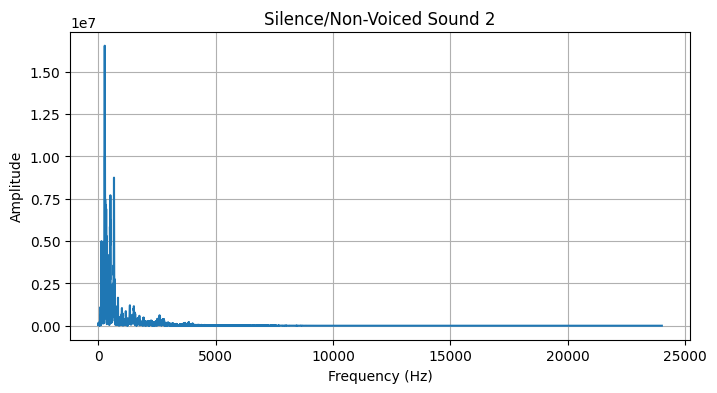

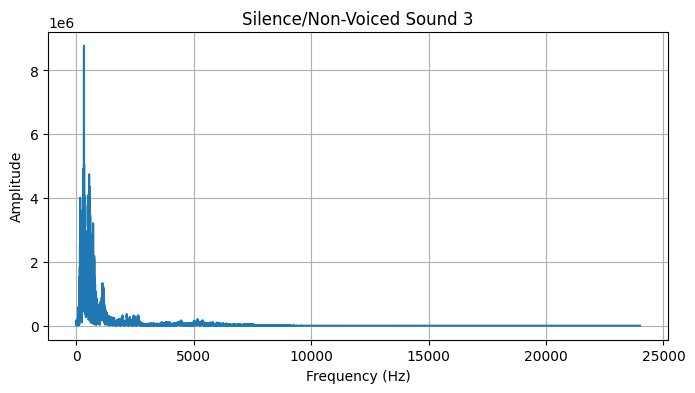

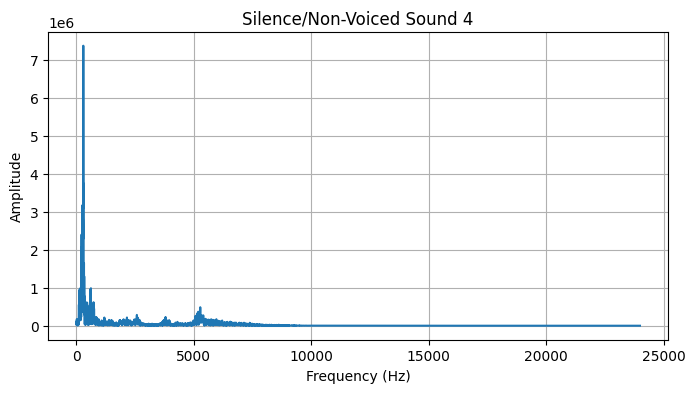

In [6]:

# A3. FFT for silence & non-voiced portions
silence_samples = [slice(start, start + fs) for start in range(fs//4, len(data), fs)]
for idx, sample in enumerate(silence_samples):
    plot_fft(data[sample], fs, f'Silence/Non-Voiced Sound {idx + 1}')


# A4. Now you have acquainted yourself with spectral amplitudes of various consonants and vowel-basedphonemes. Generate the spectrogram of thesignal and observe the change points of the signals with associatedspeech segments. Observe to identify the consonants and vowels from the spectrogram

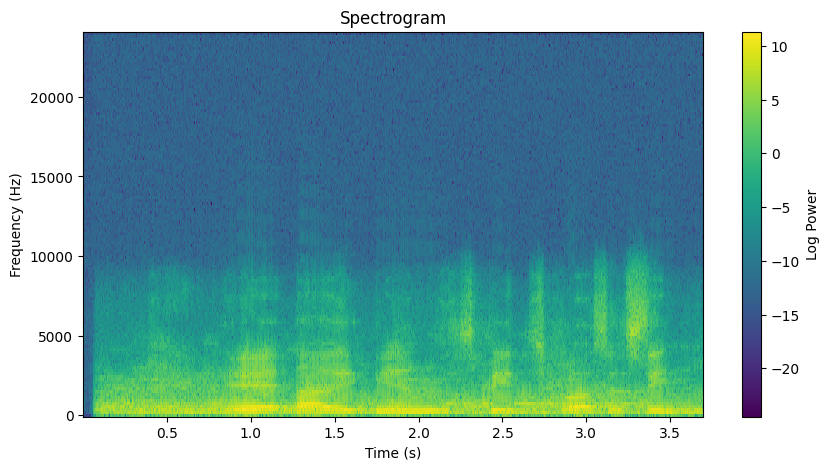

In [7]:

# A4. Spectrogram
frequencies, times, spectrogram = signal.spectrogram(data, fs)
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, np.log(spectrogram))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram')
plt.colorbar(label='Log Power')
plt.show()